# 프로젝트 2: 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## (1) 데이터 가져오기

In [1]:
import pandas as pd
import numpy as np

df_data = pd.read_csv('train.csv')

## (2) `datetime` 컬럼을 `datetime` 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [2]:
df_datetime = pd.to_datetime(df_data['datetime'])
df_data['year'] = df_datetime.dt.year
df_data['month'] = df_datetime.dt.month
df_data['day'] = df_datetime.dt.day
df_data['hour'] = df_datetime.dt.hour
df_data['minute'] = df_datetime.dt.minute
df_data['second'] = df_datetime.dt.second
df_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
- `sns.countplot` 활용해서 시각화하기
- `subplot`을 활용해서 한 번에 6개의 그래프 함께 시각화하기

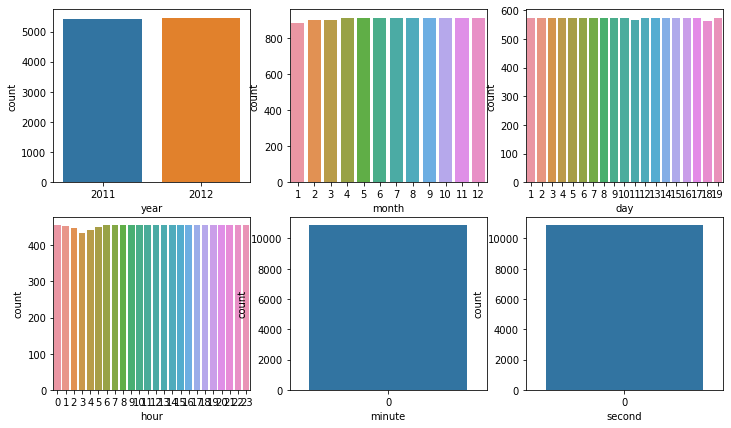

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(12, 7))

plt.subplot(2,3,1)
sns.countplot(x=df_data['year'])

plt.subplot(2,3,2)
sns.countplot(x=df_data['month'])

plt.subplot(2,3,3)
sns.countplot(x=df_data['day'])

plt.subplot(2,3,4)
sns.countplot(x=df_data['hour'])

plt.subplot(2,3,5)
sns.countplot(x=df_data['minute'])

plt.subplot(2,3,6)
sns.countplot(x=df_data['second'])

plt.show()

## (4) X, y 컬럼 선택 및 train/test 데이터 분리
- `X`(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

- `count` 값을 맞추고자 하므로, y 변수에 `count` 컬럼의 데이터 넣기

In [4]:
from sklearn.model_selection import train_test_split

df_X = df_data[['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']]
df_y = df_data['count'].values

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

## (5) LinearRegression 모델 학습
- `sklearn`의 `LinearRegression` 모델 불러오기 및 학습하기

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## (6) 학습된 모델로 `X_test`에 대한 예측값 출력 및 손실함수값 계산
- 학습된 모델에 `X_test`를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [6]:
pred = model.predict(X_test)
pred

array([237.94063631, 379.4576986 , 283.15939638, ..., 184.27851955,
        89.49246551, 316.23576231])

In [7]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
mse

20906.442806187562

In [8]:
rmse = np.sqrt(mse)
rmse

144.5906041421349

## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
- x축에 X 데이터 중 `temp` 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 `humidity` 데이터를, y축에는 count 데이터를 넣어서 시각화하기

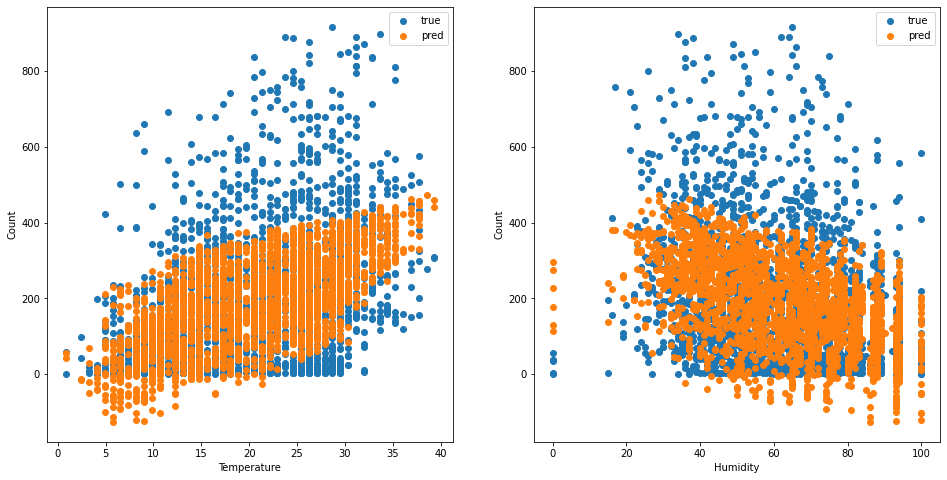

In [9]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.scatter(x=X_test['temp'], y=y_test, label='true')
plt.scatter(x=X_test['temp'], y=pred, label='pred')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x=X_test['humidity'], y=y_test, label='true')
plt.scatter(x=X_test['humidity'], y=pred, label='pred')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend()

plt.show()